## 1. R 환경 구축

In [ ]:
install.packages('sqldf')
install.packages('reshape')

In [1]:
library('readxl')
library('sqldf')
library('reshape')

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


## 2. EDA

In [2]:
repair <- read.csv('C:\\Users\\jeens\\Downloads\\RepairExample_English.csv')

In [3]:
head(repair)

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
1,FirstContact,Dian,complete,1970-01-02 8:08,Phone,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,start,1970-01-02 8:08,,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,complete,1970-01-02 8:11,,E,1340,NA,NA,NA,NA
1,ArrangeSurvey,Dian,start,1970-01-02 8:11,,,NA,NA,NA,NA,NA
1,ArrangeSurvey,Dian,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA
1,InformClientSurvey,System,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA


In [4]:
tail(repair)

,caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
13257,999,Survey,Ben,complete,1970-01-07 5:11,,,NA,FALSE,480,4,NA
13258,999,ExternRepair,DoIt,start,1970-01-07 5:11,,,NA,NA,NA,NA,NA
13259,999,RepairReady,System,complete,1970-01-07 12:23,,,NA,NA,NA,NA,TRUE
13260,999,ReadyInformClient,System,complete,1970-01-07 13:11,,,NA,NA,NA,NA,TRUE
13261,999,SendTicketToFinAdmin,System,complete,1970-01-07 16:25,,,NA,NA,NA,NA,NA
13262,999,TicketReady,System,complete,1970-01-07 16:25,,,NA,NA,NA,NA,NA


In [4]:
str(repair)

'data.frame':	13262 obs. of  12 variables:
 $ caseID             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ taskID             : Factor w/ 13 levels "ArrangeSurvey",..: 3 8 8 1 1 5 12 12 7 7 ...
 $ originator         : Factor w/ 16 levels "Anne","Barbara",..: 5 5 5 5 5 16 4 4 11 11 ...
 $ eventtype          : Factor w/ 2 levels "complete","start": 1 2 1 2 1 1 2 1 2 1 ...
 $ timestamp          : Factor w/ 5538 levels "1970-01-01 10:00",..: 776 776 777 777 779 779 4432 4438 5364 5369 ...
 $ contact            : Factor w/ 5 levels "","Letter","Personal",..: 4 1 1 1 1 1 1 1 1 1 ...
 $ RepairType         : Factor w/ 4 levels "","B","E","P": 1 1 3 1 1 1 1 1 1 1 ...
 $ objectKey          : int  NA NA 1340 NA NA NA NA NA NA NA ...
 $ RepairInternally   : logi  NA NA NA NA NA NA ...
 $ EstimatedRepairTime: int  NA NA NA NA NA NA NA 240 NA NA ...
 $ RepairCode         : int  NA NA NA NA NA NA NA 1 NA NA ...
 $ RepairOK           : logi  NA NA NA NA NA NA ...


In [41]:
sqldf('SELECT taskID, COUNT(taskID) FROM repair GROUP BY taskID;')

taskID,COUNT(taskID)
ArrangeSurvey,1854
ExternRepair,132
FirstContact,1000
ImmediateRepair,766
InformClientSurvey,927
InformClientWrongPlace,73
InternRepair,1094
MakeTicket,1854
ReadyInformClient,927
RepairReady,927


In [47]:
sqldf('SELECT originator, COUNT(originator) as CNT FROM repair GROUP BY originator')

originator,CNT
Anne,866
Barbara,428
Ben,120
Cindy,388
Dian,2246
DoIt,66
Edd,372
Eric,98
FixIt,66
Jacky,438


In [12]:
sqldf('SELECT originator, taskID, COUNT(*) as CNT FROM repair GROUP BY originator')

originator,taskID,CNT
Anne,ImmediateRepair,866
Barbara,ImmediateRepair,428
Ben,Survey,120
Cindy,InternRepair,388
Dian,ArrangeSurvey,2246
DoIt,ExternRepair,66
Edd,Survey,372
Eric,InternRepair,98
FixIt,ExternRepair,66
Jacky,ImmediateRepair,438


In [17]:
sqldf('SELECT taskID, eventtype FROM repair GROUP BY taskID, eventtype ORDER BY taskID, eventtype;')

taskID,eventtype
ArrangeSurvey,complete
ArrangeSurvey,start
ExternRepair,start
FirstContact,complete
ImmediateRepair,complete
ImmediateRepair,start
InformClientSurvey,complete
InformClientWrongPlace,complete
InternRepair,complete
InternRepair,start


In [19]:
sqldf('SELECT originator, taskID FROM repair WHERE originator like "System" GROUP BY taskID;')

originator,taskID
System,InformClientSurvey
System,ReadyInformClient
System,RepairReady
System,SendTicketToFinAdmin
System,TicketReady


In [31]:
sqldf('SELECT originator, taskID FROM repair WHERE originator like "Dian" GROUP BY taskID;')

originator,taskID
Dian,ArrangeSurvey
Dian,FirstContact
Dian,InformClientWrongPlace
Dian,MakeTicket


In [20]:
sqldf('SELECT originator, taskID FROM repair WHERE originator like "Cindy" GROUP BY taskID;')

originator,taskID
Cindy,InternRepair
Cindy,Survey


In [21]:
sqldf('SELECT originator, taskID FROM repair WHERE originator like "John" GROUP BY taskID;')

originator,taskID
John,InternRepair
John,Survey


In [22]:
sqldf('SELECT originator, taskID FROM repair WHERE originator like "Monica" GROUP BY taskID;')

originator,taskID
Monica,ArrangeSurvey
Monica,FirstContact
Monica,InformClientWrongPlace
Monica,MakeTicket


In [25]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Jacky" GROUP BY taskID;')

originator,taskID,eventtype
Jacky,ImmediateRepair,complete
Jacky,InternRepair,complete
Jacky,Survey,complete


In [26]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Eric" GROUP BY taskID;')

originator,taskID,eventtype
Eric,ImmediateRepair,complete
Eric,InternRepair,complete
Eric,Survey,complete


In [28]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "FixIt" GROUP BY taskID;')

originator,taskID,eventtype
FixIt,ExternRepair,start


In [29]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Nick" GROUP BY taskID;')

originator,taskID,eventtype
Nick,ImmediateRepair,complete
Nick,InternRepair,complete
Nick,Survey,complete


In [30]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Anne" GROUP BY taskID;')

originator,taskID,eventtype
Anne,ImmediateRepair,complete
Anne,InternRepair,complete
Anne,Survey,complete


In [31]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Paul" GROUP BY taskID;')

originator,taskID,eventtype
Paul,InternRepair,complete
Paul,Survey,complete


In [32]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Edd" GROUP BY taskID;')

originator,taskID,eventtype
Edd,InternRepair,complete
Edd,Survey,complete


In [33]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Lex" GROUP BY taskID;')

originator,taskID,eventtype
Lex,ImmediateRepair,complete
Lex,InternRepair,complete
Lex,Survey,complete


In [34]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Barbara" GROUP BY taskID;')

originator,taskID,eventtype
Barbara,ImmediateRepair,complete
Barbara,InternRepair,complete
Barbara,Survey,complete


In [36]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "DoIt" GROUP BY taskID;')

originator,taskID,eventtype
DoIt,ExternRepair,start


In [37]:
sqldf('SELECT originator, taskID, eventtype FROM repair WHERE originator like "Ben" GROUP BY taskID;')

originator,taskID,eventtype
Ben,ImmediateRepair,complete
Ben,InternRepair,complete
Ben,Survey,complete


In [9]:
sqldf('SELECT originator, taskID FROM repair WHERE taskID like "FirstContact" GROUP BY originator;')

originator,taskID
Dian,FirstContact
Monica,FirstContact


## 3. CASE 탐색

In [49]:
sqldf('SELECT * FROM repair WHERE CaseID = 1')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
1,FirstContact,Dian,complete,1970-01-02 8:08,Phone,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,start,1970-01-02 8:08,,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,complete,1970-01-02 8:11,,E,1340,NA,NA,NA,NA
1,ArrangeSurvey,Dian,start,1970-01-02 8:11,,,NA,NA,NA,NA,NA
1,ArrangeSurvey,Dian,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA
1,InformClientSurvey,System,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA
1,Survey,Cindy,start,1970-01-11 21:33,,,NA,NA,NA,NA,NA
1,Survey,Cindy,complete,1970-01-11 21:56,,,NA,TRUE,240,1,NA
1,InternRepair,John,start,1970-01-17 4:36,,,NA,NA,NA,NA,NA
1,InternRepair,John,complete,1970-01-17 8:12,,,NA,NA,NA,NA,NA


In [50]:
sqldf('SELECT * FROM repair WHERE CaseID = 2')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
2,FirstContact,Dian,complete,1970-01-08 5:17,Personal,,NA,NA,NA,NA,NA
2,MakeTicket,Dian,start,1970-01-08 5:17,,,NA,NA,NA,NA,NA
2,MakeTicket,Dian,complete,1970-01-08 5:21,,P,8161,NA,NA,NA,NA
2,ArrangeSurvey,Dian,start,1970-01-08 5:21,,,NA,NA,NA,NA,NA
2,ArrangeSurvey,Dian,complete,1970-01-08 5:25,,,NA,NA,NA,NA,NA
2,InformClientSurvey,System,complete,1970-01-08 5:25,,,NA,NA,NA,NA,NA
2,Survey,Anne,start,1970-01-12 4:19,,,NA,NA,NA,NA,NA
2,Survey,Anne,complete,1970-01-12 4:57,,,NA,TRUE,120,1,NA
2,ImmediateRepair,Anne,start,1970-01-12 4:57,,,NA,NA,NA,NA,NA
2,ImmediateRepair,Anne,complete,1970-01-12 6:57,,,NA,NA,NA,NA,NA


In [19]:
sqldf('SELECT * FROM repair WHERE CaseID = 12')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
12,FirstContact,Monica,complete,1970-01-02 18:15,Personal,,NA,NA,NA,NA,NA
12,MakeTicket,Monica,start,1970-01-02 18:15,,,NA,NA,NA,NA,NA
12,MakeTicket,Monica,complete,1970-01-02 18:21,,E,7195,NA,NA,NA,NA
12,ArrangeSurvey,Monica,start,1970-01-02 18:21,,,NA,NA,NA,NA,NA
12,ArrangeSurvey,Monica,complete,1970-01-02 18:24,,,NA,NA,NA,NA,NA
12,InformClientSurvey,System,complete,1970-01-02 18:24,,,NA,NA,NA,NA,NA
12,Survey,Edd,start,1970-01-05 20:50,,,NA,NA,NA,NA,NA
12,Survey,Edd,complete,1970-01-05 21:41,,,NA,TRUE,240,1,NA
12,InternRepair,Paul,start,1970-01-08 4:49,,,NA,NA,NA,NA,NA
12,InternRepair,Paul,complete,1970-01-08 9:13,,,NA,NA,NA,NA,NA


In [56]:
sqldf('SELECT * FROM repair WHERE taskID like "ExternRepair" GROUP BY eventtype')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
999,ExternRepair,DoIt,start,1970-01-07 5:11,,,NA,NA,NA,NA,NA


- Extern Repair에는 complete가 없는 것 확인

In [74]:
sqldf('SELECT t.caseID, t.taskID, count(*) FROM repair AS t WHERE taskID like "InternRepair" GROUP BY t.caseID, t.taskID HAVING COUNT(*) > 3')

caseID,taskID,count(*)
12,InternRepair,4
39,InternRepair,4
52,InternRepair,4
62,InternRepair,4
73,InternRepair,4
84,InternRepair,4
111,InternRepair,4
124,InternRepair,4
143,InternRepair,4
160,InternRepair,4


* Intern Repair가 여러개 있는 Case 확인

## 4. Data Handling
### 1. Melt & Cast

In [29]:
melrepair <- melt(repair, id = c('taskID'))

In [30]:
head(melrepair)

taskID,variable,value
FirstContact,caseID,1
MakeTicket,caseID,1
MakeTicket,caseID,1
ArrangeSurvey,caseID,1
ArrangeSurvey,caseID,1
InformClientSurvey,caseID,1


In [43]:
castrepair <- cast(melrepair, value ~ taskID)

Aggregation requires fun.aggregate: length used as default


In [44]:
head(castrepair)

value,ArrangeSurvey,ExternRepair,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
,3708,264,1000,1532,1854,146,2188,2781,1854,1854,1854,3708,1854
1,2,0,1,0,1,0,2,2,1,1,1,552,1
10,2,0,1,2,1,0,0,2,1,1,1,2,1
100,2,1,1,0,1,0,0,2,1,1,1,2,1
1000,2,0,1,0,1,0,2,2,1,1,1,2,1
1001,0,0,0,0,0,0,0,1,0,0,0,0,0


In [53]:
meca <- read.csv('C:\\Users\\jeens\\Downloads\\test.csv')

In [59]:
melrepair <- melt(meca, id = c('taskID'))

In [60]:
castrepair <- cast(melrepair, value ~ taskID)

Aggregation requires fun.aggregate: length used as default


In [61]:
head(castrepair)

value,ArrangeSurvey,ExternRepair,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
1,2,0,1,0,1,0,2,2,1,1,1,2,1
2,2,1,1,2,1,0,0,2,1,1,1,2,1
3,2,0,1,0,1,0,2,2,1,1,1,2,1
4,2,0,1,2,1,0,0,2,1,1,1,2,1
5,2,0,1,2,1,0,0,2,1,1,1,2,1
6,0,0,1,0,0,1,0,0,0,0,0,0,0


In [62]:
tail(castrepair)

,value,ArrangeSurvey,ExternRepair,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
996,996,2,0,1,0,1,0,2,2,1,1,1,2,1
997,997,2,0,1,0,1,0,2,2,1,1,1,2,1
998,998,2,0,1,0,1,0,2,2,1,1,1,2,1
999,999,2,1,1,0,1,0,0,2,1,1,1,2,1
1000,1000,2,0,1,0,1,0,2,2,1,1,1,2,1
1001,NA,5562,396,3000,2298,2781,219,3282,5562,2781,2781,2781,5562,2781


### 2. Repair Process COUNT 

In [65]:
sqldf('SELECT value, InternRepair, ImmediateRepair FROM castrepair WHERE InternRepair > 0 and ImmediateRepair > 0')

value,InternRepair,ImmediateRepair
35,2,2
36,2,2
41,2,2
153,2,2
155,2,2
286,2,2
395,2,2
404,2,2
456,2,2
493,2,2


In [67]:
sqldf('SELECT COUNT(value) FROM castrepair WHERE InternRepair > 0 and ImmediateRepair > 0')

COUNT(value)
23


In [69]:
sqldf('SELECT value, ExternRepair, ImmediateRepair FROM castrepair WHERE ExternRepair > 0 and ImmediateRepair > 0')

value,ExternRepair,ImmediateRepair
2,1,2
15,1,2
41,1,2
48,1,2
99,1,2
110,1,2
125,1,2
133,1,2
175,1,2
180,1,2


In [70]:
sqldf('SELECT COUNT(value) FROM castrepair WHERE ExternRepair > 0 and ImmediateRepair > 0')

COUNT(value)
43


In [82]:
sqldf('SELECT value, InternRepair, ExternRepair, ImmediateRepair FROM castrepair WHERE InternRepair > 0 and ExternRepair > 0 and ImmediateRepair > 0')

value,InternRepair,ExternRepair,ImmediateRepair
41,2,1,2
456,2,1,2
613,2,1,2
653,2,1,2
775,2,1,2
NA,3282,396,2298


### 3. Melt & Cast

In [11]:
orgtsk <- read.csv('C:\\Users\\jeens\\Downloads\\test2.csv')

In [12]:
head(orgtsk)

taskID,originator,X,X.1,X.2
FirstContact,Dian,NA,NA,NA
MakeTicket,Dian,NA,NA,NA
MakeTicket,Dian,NA,NA,NA
ArrangeSurvey,Dian,NA,NA,NA
ArrangeSurvey,Dian,NA,NA,NA
InformClientSurvey,System,NA,NA,NA


In [15]:
ortk <- orgtsk[0:2]

In [16]:
head(ortk)

taskID,originator
FirstContact,Dian
MakeTicket,Dian
MakeTicket,Dian
ArrangeSurvey,Dian
ArrangeSurvey,Dian
InformClientSurvey,System


In [18]:
meltortk <- melt(ortk, id = 'originator')

In [19]:
head(meltortk)

originator,variable,value
Dian,taskID,FirstContact
Dian,taskID,MakeTicket
Dian,taskID,MakeTicket
Dian,taskID,ArrangeSurvey
Dian,taskID,ArrangeSurvey
System,taskID,InformClientSurvey


In [23]:
castortk <- cast(meltortk, originator~ value)

Aggregation requires fun.aggregate: length used as default


In [25]:
castortk

originator,ArrangeSurvey,ExternRepair,FirstContact,ImmediateRepair,InformClientSurvey,InformClientWrongPlace,InternRepair,MakeTicket,ReadyInformClient,RepairReady,SendTicketToFinAdmin,Survey,TicketReady
Anne,0,0,0,370,0,0,60,0,0,0,0,436,0
Barbara,0,0,0,176,0,0,30,0,0,0,0,222,0
Ben,0,0,0,8,0,0,42,0,0,0,0,70,0
Cindy,0,0,0,0,0,0,200,0,0,0,0,188,0
Dian,877,0,466,0,0,29,0,874,0,0,0,0,0
DoIt,0,66,0,0,0,0,0,0,0,0,0,0,0
Edd,0,0,0,0,0,0,210,0,0,0,0,162,0
Eric,0,0,0,8,0,0,44,0,0,0,0,46,0
FixIt,0,66,0,0,0,0,0,0,0,0,0,0,0
Jacky,0,0,0,184,0,0,34,0,0,0,0,220,0


### 4. Sort

In [33]:
orgtsk_sort <- castortk[, c(1, 4, 7, 9, 2, 6, 13, 5, 8, 3, 11, 10, 12, 14)]

In [34]:
orgtsk_sort

originator,FirstContact,InformClientWrongPlace,MakeTicket,ArrangeSurvey,InformClientSurvey,Survey,ImmediateRepair,InternRepair,ExternRepair,RepairReady,ReadyInformClient,SendTicketToFinAdmin,TicketReady
Anne,0,0,0,0,0,436,370,60,0,0,0,0,0
Barbara,0,0,0,0,0,222,176,30,0,0,0,0,0
Ben,0,0,0,0,0,70,8,42,0,0,0,0,0
Cindy,0,0,0,0,0,188,0,200,0,0,0,0,0
Dian,466,29,874,877,0,0,0,0,0,0,0,0,0
DoIt,0,0,0,0,0,0,0,0,66,0,0,0,0
Edd,0,0,0,0,0,162,0,210,0,0,0,0,0
Eric,0,0,0,0,0,46,8,44,0,0,0,0,0
FixIt,0,0,0,0,0,0,0,0,66,0,0,0,0
Jacky,0,0,0,0,0,220,184,34,0,0,0,0,0


In [51]:
orgtsk_full_sort <- castortk[c(5, 13, 1, 2, 10, 4, 11, 15, 7, 3, 8, 14, 12, 6, 9), c(1, 4, 7, 9, 2, 13, 5, 8, 3)]

In [52]:
orgtsk_full_sort

,originator,FirstContact,InformClientWrongPlace,MakeTicket,ArrangeSurvey,Survey,ImmediateRepair,InternRepair,ExternRepair
5,Dian,466,29,874,877,0,0,0,0
13,Monica,534,44,980,977,0,0,0,0
1,Anne,0,0,0,0,436,370,60,0
2,Barbara,0,0,0,0,222,176,30,0
10,Jacky,0,0,0,0,220,184,34,0
4,Cindy,0,0,0,0,188,0,200,0
11,John,0,0,0,0,202,0,194,0
15,Paul,0,0,0,0,188,0,200,0
7,Edd,0,0,0,0,162,0,210,0
3,Ben,0,0,0,0,70,8,42,0


## 5. Visualization

In [54]:
bar <- orgtsk_full_sort[c(1, 2), c(1, 2, 3, 4, 5)]

In [68]:
bar2 <- bar[, c(-1)]

In [69]:
bar2

,FirstContact,InformClientWrongPlace,MakeTicket,ArrangeSurvey
5,466,29,874,877
13,534,44,980,977


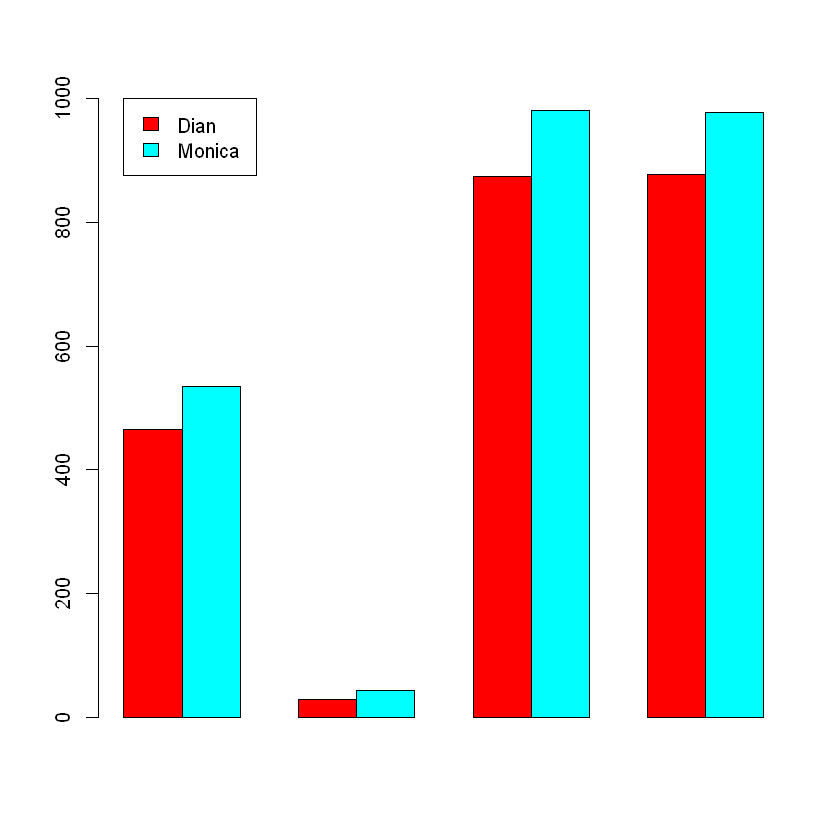

In [77]:
barplot(as.matrix(bar2), beside = T, col = rainbow(nrow(bar2)), ylim = c(0, 1000))
legend(1, 1000, c('Dian', 'Monica'), fill = rainbow(nrow(bar2)))

In [78]:
bar3 <- orgtsk_full_sort[c(14, 15), c(9)]

In [79]:
bar3

[1] 66 66

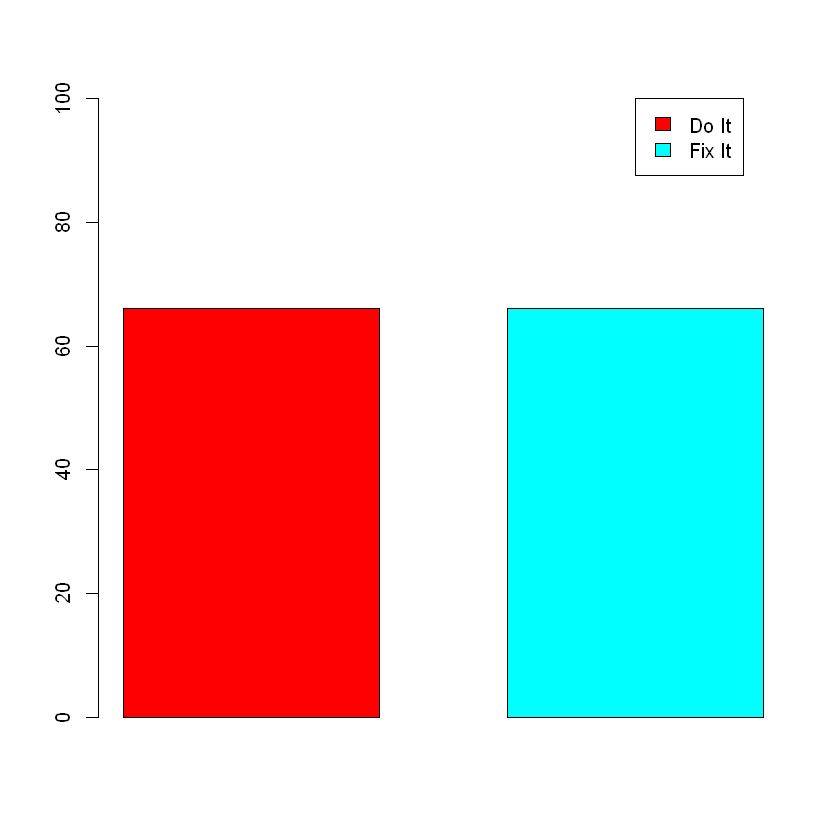

In [87]:
barplot(as.matrix(bar3), beside = T, col = rainbow(nrow(bar2)), ylim = c(0, 100), space = 0.5)
legend(2.5, 100, c('Do It', 'Fix It'), fill = rainbow(nrow(bar2)))

In [92]:
bar4 <- orgtsk_full_sort[c(3 : 13), c(6 : 8)]

In [93]:
bar4

,Survey,ImmediateRepair,InternRepair
1,436,370,60
2,222,176,30
10,220,184,34
4,188,0,200
11,202,0,194
15,188,0,200
7,162,0,210
3,70,8,42
8,46,8,44
14,66,6,36


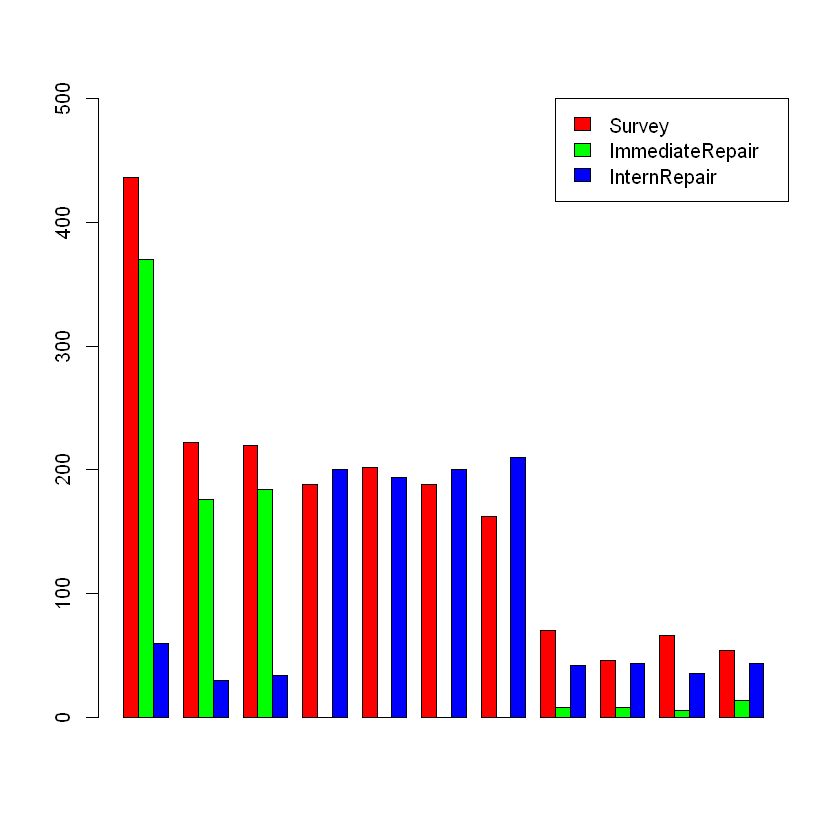

In [119]:
barplot(as.matrix(t(bar4)), beside = T, col = rainbow(nrow(t(bar4))), ylim = c(0, 500))
legend(30, 500, c('Survey', 'ImmediateRepair', 'InternRepair'), fill = rainbow(nrow(t(bar4))))

In [120]:
head(repair)

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
1,FirstContact,Dian,complete,1970-01-02 8:08,Phone,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,start,1970-01-02 8:08,,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,complete,1970-01-02 8:11,,E,1340,NA,NA,NA,NA
1,ArrangeSurvey,Dian,start,1970-01-02 8:11,,,NA,NA,NA,NA,NA
1,ArrangeSurvey,Dian,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA
1,InformClientSurvey,System,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA


In [154]:
bar6 <- sqldf('SELECT contact, COUNT(*) FROM repair GROUP BY contact')

In [155]:
bar6

contact,COUNT(*)
,12262
Letter,225
Personal,240
Phone,270
Web,265


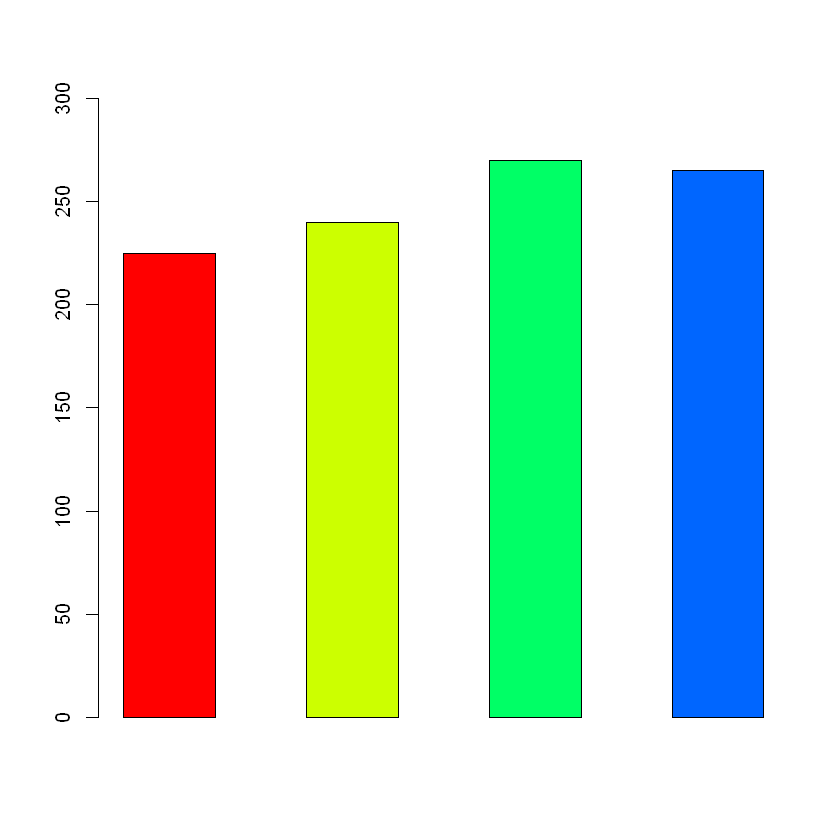

In [167]:
barplot(as.matrix(bar6[c(2, 3, 4, 5), c(2)]), beside=T, space = 1, ylim = c(0, 300), col = rainbow(nrow(bar6)))

## 6. Column[6 :] 탐색

In [126]:
sqldf('SELECT DISTINCT RepairType From repair')

RepairType
""
E
P
B


In [130]:
sqldf('SELECT DISTINCT EstimatedRepairTime From repair')

EstimatedRepairTime
NA
240
120
480
220
360
60
160


In [131]:
sqldf('SELECT DISTINCT RepairCode From repair')

RepairCode
NA
1
4
2
3


In [151]:
bar5 <- sqldf('SELECT COUNT(taskID), RepairCode From repair GROUP BY RepairCode')

In [152]:
bar5

COUNT(taskID),RepairCode
12335,NA
550,1
224,2
94,3
59,4


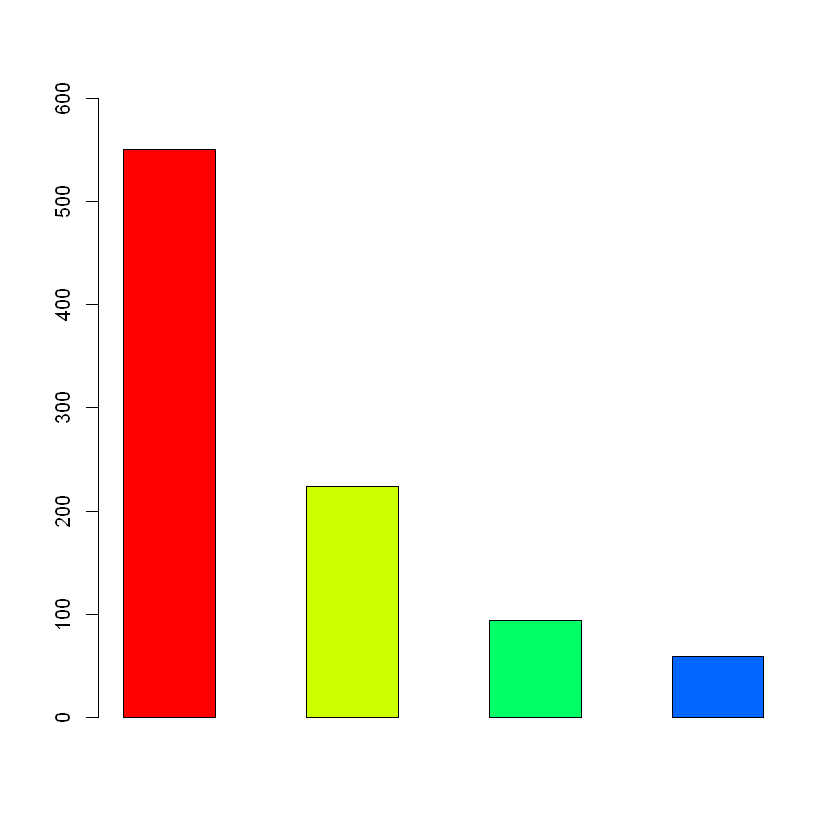

In [169]:
barplot(as.matrix(bar5[c(2, 3, 4, 5), c(1)]), beside=T, space = 1, ylim = c(0, 600), col = rainbow(nrow(bar6)))

In [137]:
sqldf('SELECT caseID, taskID FROM repair WHERE caseID = (SELECT caseID FROM repair WHERE RepairCode = 4 ORDER BY CaseID) AND taskID = "ExternRepair"')

caseID,taskID
17,ExternRepair


In [4]:
head(repair)

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
1,FirstContact,Dian,complete,1970-01-02 8:08,Phone,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,start,1970-01-02 8:08,,,NA,NA,NA,NA,NA
1,MakeTicket,Dian,complete,1970-01-02 8:11,,E,1340,NA,NA,NA,NA
1,ArrangeSurvey,Dian,start,1970-01-02 8:11,,,NA,NA,NA,NA,NA
1,ArrangeSurvey,Dian,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA
1,InformClientSurvey,System,complete,1970-01-02 8:16,,,NA,NA,NA,NA,NA


In [6]:
sqldf('SELECT * FROM repair WHERE caseID = 12')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
12,FirstContact,Monica,complete,1970-01-02 18:15,Personal,,NA,NA,NA,NA,NA
12,MakeTicket,Monica,start,1970-01-02 18:15,,,NA,NA,NA,NA,NA
12,MakeTicket,Monica,complete,1970-01-02 18:21,,E,7195,NA,NA,NA,NA
12,ArrangeSurvey,Monica,start,1970-01-02 18:21,,,NA,NA,NA,NA,NA
12,ArrangeSurvey,Monica,complete,1970-01-02 18:24,,,NA,NA,NA,NA,NA
12,InformClientSurvey,System,complete,1970-01-02 18:24,,,NA,NA,NA,NA,NA
12,Survey,Edd,start,1970-01-05 20:50,,,NA,NA,NA,NA,NA
12,Survey,Edd,complete,1970-01-05 21:41,,,NA,TRUE,240,1,NA
12,InternRepair,Paul,start,1970-01-08 4:49,,,NA,NA,NA,NA,NA
12,InternRepair,Paul,complete,1970-01-08 9:13,,,NA,NA,NA,NA,NA


In [7]:
sqldf('SELECT * FROM repair WHERE caseID = 39')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
39,FirstContact,Dian,complete,1970-01-05 17:57,Web,,NA,NA,NA,NA,NA
39,MakeTicket,Dian,start,1970-01-05 17:57,,,NA,NA,NA,NA,NA
39,MakeTicket,Dian,complete,1970-01-05 18:02,,E,1672,NA,NA,NA,NA
39,ArrangeSurvey,Dian,start,1970-01-05 18:02,,,NA,NA,NA,NA,NA
39,ArrangeSurvey,Dian,complete,1970-01-05 18:07,,,NA,NA,NA,NA,NA
39,InformClientSurvey,System,complete,1970-01-05 18:07,,,NA,NA,NA,NA,NA
39,Survey,Paul,start,1970-01-11 23:06,,,NA,NA,NA,NA,NA
39,Survey,Paul,complete,1970-01-11 23:22,,,NA,TRUE,240,1,NA
39,InternRepair,Paul,start,1970-01-18 21:37,,,NA,NA,NA,NA,NA
39,InternRepair,Paul,complete,1970-01-19 2:01,,,NA,NA,NA,NA,NA


In [8]:
sqldf('SELECT * FROM repair WHERE caseID = 52')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
52,FirstContact,Dian,complete,1970-01-01 20:43,Phone,,NA,NA,NA,NA,NA
52,MakeTicket,Dian,start,1970-01-01 20:43,,,NA,NA,NA,NA,NA
52,MakeTicket,Dian,complete,1970-01-01 20:49,,E,2059,NA,NA,NA,NA
52,ArrangeSurvey,Dian,start,1970-01-01 20:49,,,NA,NA,NA,NA,NA
52,ArrangeSurvey,Dian,complete,1970-01-01 20:54,,,NA,NA,NA,NA,NA
52,InformClientSurvey,System,complete,1970-01-01 20:54,,,NA,NA,NA,NA,NA
52,Survey,Cindy,start,1970-01-01 22:10,,,NA,NA,NA,NA,NA
52,Survey,Cindy,complete,1970-01-01 23:01,,,NA,TRUE,220,2,NA
52,InternRepair,Cindy,start,1970-01-01 23:01,,,NA,NA,NA,NA,NA
52,InternRepair,Cindy,complete,1970-01-02 2:41,,,NA,NA,NA,NA,NA


In [12]:
sqldf('SELECT * FROM repair WHERE caseID = (SELECT caseID FROM repair WHERE taskID  "InternRepair" GROUP BY caseID, taskID Having COUNT(*) > 3)')

ERROR: Error in rsqlite_send_query(conn@ptr, statement): no such table: InternRepair


In [14]:
sqldf('SELECT * FROM repair WHERE caseID = 41')

caseID,taskID,originator,eventtype,timestamp,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK
41,FirstContact,Dian,complete,1970-01-01 15:15,Phone,,NA,NA,NA,NA,NA
41,MakeTicket,Dian,start,1970-01-01 15:15,,,NA,NA,NA,NA,NA
41,MakeTicket,Dian,complete,1970-01-01 15:21,,P,6789,NA,NA,NA,NA
41,ArrangeSurvey,Dian,start,1970-01-01 15:21,,,NA,NA,NA,NA,NA
41,ArrangeSurvey,Dian,complete,1970-01-01 15:25,,,NA,NA,NA,NA,NA
41,InformClientSurvey,System,complete,1970-01-01 15:25,,,NA,NA,NA,NA,NA
41,Survey,Anne,start,1970-01-01 16:45,,,NA,NA,NA,NA,NA
41,Survey,Anne,complete,1970-01-01 17:35,,,NA,TRUE,120,3,NA
41,ImmediateRepair,Anne,start,1970-01-01 17:35,,,NA,NA,NA,NA,NA
41,ImmediateRepair,Anne,complete,1970-01-01 19:35,,,NA,NA,NA,NA,NA
